In [1]:
import h5py

import pywt
import wavelets

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from kpnet.cluster import *
from kpnet.handler import *
from kpnet.network import *
from kpnet.signal import *
from kpnet.callback import *
from kpnet.entropy import *

In [2]:
np.random.seed(0)
N = 64
time_interval = 2 ** 15

callbacks = {}
for i in range(1, N):
    callbacks['W_' + str(i)] = Weight0Callback(time_interval, 0, i)
    
signal = SwitchSignal([2000, time_interval], [RandomUnitSignal(N), ZeroSignal(N)])
net = KPNetworkTanh(N, alpha = 0.001, beta = 0.3, gamma = 2.0)
handler = ComputationHandler(time_interval)
results = handler.run(net, signal, callbacks)

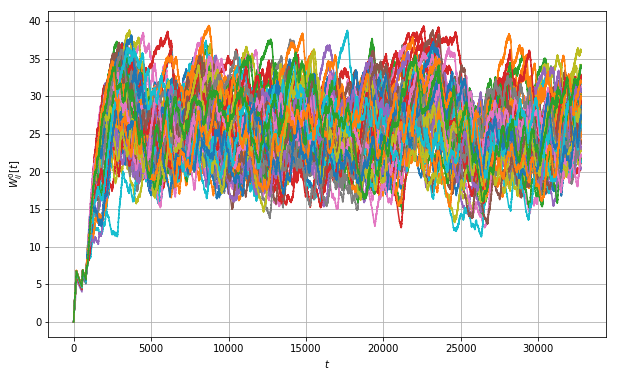

In [3]:
plt.figure(figsize=(10, 6))
for value in results.values():
    plt.plot(value)
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

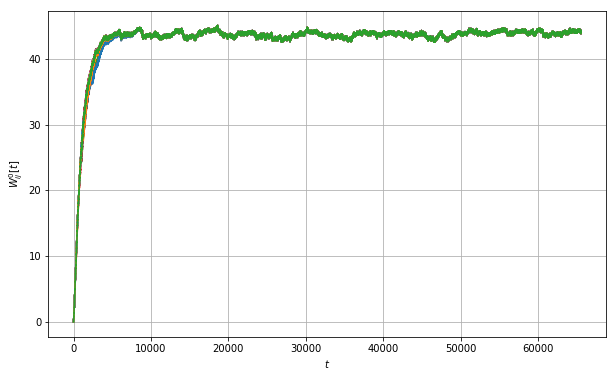

In [4]:
W = h5py.File('data/hfd5/period1.hfd5', 'r')['W']
plt.figure(figsize=(10, 6))
for i in range(1, N):
    plt.plot(W[0, i])
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

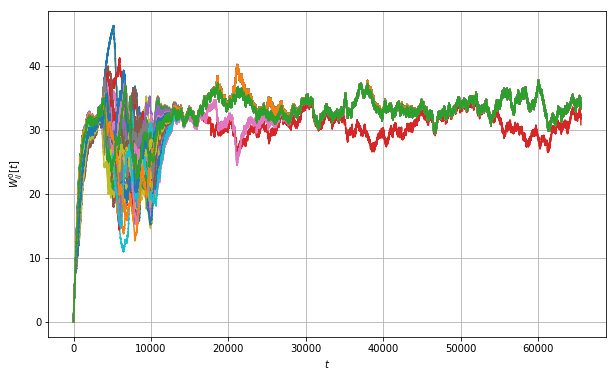

In [5]:
W = h5py.File('data/hfd5/trans2.hfd5', 'r')['W']
plt.figure(figsize=(10, 6))
for i in range(1, N):
    plt.plot(W[0, i])
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

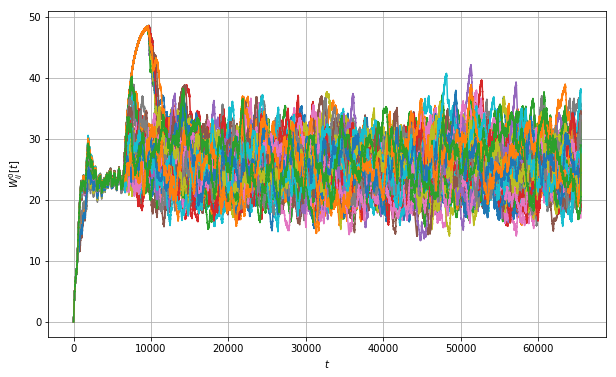

In [6]:
W = h5py.File('data/hfd5/cluster1.hfd5', 'r')['W']
plt.figure(figsize=(10, 6))
for i in range(1, N):
    plt.plot(W[0, i])
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()